# Overview
- Library Installation
- Dataset - histograms of wet tank air pressures from buses
- Anomaly Detection with COSMO method
- Reviewing anomaly scores with repair events

# Installing required libraries

Let's start by installing required libraries.

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import os, math



# Dataset

We start by loading the dataset.

In [3]:
df_hist=pd.read_csv('../data/lab1_example_data.csv')

In [4]:
df_hist.head(5)

,id,t,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,...,bin_50,bin_51,bin_52,bin_53,bin_54,bin_55,bin_56,bin_57,bin_58,bin_59
0,0,2011-08-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005208,0.014583,0.077083,0.182292,0.188542,0.143750,0.136458,0.108333,0.094792,0.046875
1,0,2011-08-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.014625,0.034735,0.149909,0.223035,0.190128,0.170018,0.149909,0.047532,0.000000
2,0,2011-08-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007447,0.018085,0.041489,0.139362,0.210638,0.161702,0.161702,0.157447,0.091489,0.001064
3,0,2011-08-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,2011-11-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021926,0.007745,0.011781,0.029890,0.132650,0.206720,0.214901,0.213592,0.135922,0.011672


In [5]:
df_hist["id"].unique()

array([ 0,  2,  4,  5,  6,  8, 12, 13, 14, 15, 16], dtype=int64)

In [6]:
df_hist.describe()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,...,bin_50,bin_51,bin_52,bin_53,bin_54,bin_55,bin_56,bin_57,bin_58,bin_59
count,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,...,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000
mean,8.387791,0.002858,0.000076,0.000106,0.000115,0.000109,0.000106,0.000092,0.000097,0.000108,...,0.016058,0.052036,0.092238,0.113985,0.128505,0.128184,0.130307,0.133766,0.094371,0.045869
std,5.274358,0.038005,0.000754,0.001404,0.001322,0.001336,0.001019,0.000985,0.000847,0.001114,...,0.019064,0.037992,0.046314,0.046388,0.043205,0.039574,0.049656,0.050777,0.045345,0.045104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006294,0.021395,0.052564,0.101457,0.111795,0.109232,0.104056,0.104517,0.073609,0.003331
50%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011931,0.042269,0.108748,0.121579,0.129475,0.124062,0.121197,0.123881,0.094660,0.040664
75%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019860,0.078985,0.128194,0.139790,0.150296,0.145025,0.145119,0.150911,0.111341,0.074501
max,16.000000,1.000000,0.018182,0.046053,0.037162,0.051780,0.028571,0.028343,0.019802,0.036161,...,0.500000,0.300000,0.454545,1.000000,1.000000,0.364796,0.800000,0.454545,0.500000,0.625000


In [7]:
df_hist["t"] = pd.to_datetime(df_hist["t"])

In [8]:
df_hist['date_week'] = df_hist['t'].dt.to_period('W')
df_hist["date_week"].unique()

<PeriodArray>
['2011-08-01/2011-08-07', '2011-08-08/2011-08-14', '2011-08-15/2011-08-21',
 '2011-11-14/2011-11-20', '2011-11-21/2011-11-27', '2011-11-28/2011-12-04',
 '2011-12-05/2011-12-11', '2011-12-12/2011-12-18', '2011-12-19/2011-12-25',
 '2011-12-26/2012-01-01', '2012-01-02/2012-01-08', '2012-01-09/2012-01-15',
 '2012-01-16/2012-01-22', '2012-01-23/2012-01-29', '2012-01-30/2012-02-05',
 '2012-02-06/2012-02-12', '2012-02-13/2012-02-19', '2012-02-20/2012-02-26',
 '2012-02-27/2012-03-04', '2012-03-05/2012-03-11', '2012-03-12/2012-03-18',
 '2012-03-19/2012-03-25', '2012-03-26/2012-04-01', '2012-04-02/2012-04-08',
 '2012-04-09/2012-04-15', '2012-04-16/2012-04-22', '2012-04-23/2012-04-29',
 '2012-04-30/2012-05-06', '2012-05-07/2012-05-13', '2012-05-14/2012-05-20',
 '2012-05-21/2012-05-27', '2012-05-28/2012-06-03', '2012-06-04/2012-06-10',
 '2012-06-11/2012-06-17', '2012-06-18/2012-06-24', '2012-06-25/2012-07-01',
 '2012-07-02/2012-07-08', '2012-07-09/2012-07-15', '2012-07-16/2012-07-22'

# Anomaly Detection with COSMO method

Implementing the COSMO method according to the pseudocode, and material in slides.



In [10]:
# Initialization

random_state = 42
nn_samples_reference_group = 200
histogram_param = [xx for xx in df_hist.columns if "bin" in xx]

df_hist['date_week'] = df_hist['t'].dt.to_period('W')
week_lst = list(df_hist['date_week'].unique())
T_u = 4 # 4 weeks

df_hist["z_score"] = np.nan
df_hist["anomaly_score"] = np.nan

# Selected metric - Hellinger distance
def hellinger_dist(u, v):
    a = 0.0
    for v1,v2 in zip(np.array(u).flat,np.array(v).flat):
        a += (math.sqrt(v1)-math.sqrt(v2))**2
    return math.sqrt(a/2)

# Computing distance matrix
def compute_distance_matrix(samples):
    def symmetrize(a):
        return a + a.T - np.diag(a.diagonal())
    
    dist_matrix = np.zeros((len(samples), len(samples)))
    
    for ir in range(len(samples)):
        for ic in range(ir, len(samples)):
            dist_matrix[ir, ic] = hellinger_dist(samples[ir], samples[ic])

    return symmetrize(dist_matrix)

# Acquire the most central pattern
def get_mcp(samples):
    dist_matrix = compute_distance_matrix(samples)
    mcp_idx = dist_matrix.sum(axis=1).argmin()
    return samples[mcp_idx], dist_matrix[mcp_idx]


In [11]:
df_hist.head()

,id,t,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,...,bin_53,bin_54,bin_55,bin_56,bin_57,bin_58,bin_59,date_week,z_score,anomaly_score
0,0,2011-08-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.182292,0.188542,0.143750,0.136458,0.108333,0.094792,0.046875,2011-08-01/2011-08-07,NaN,NaN
1,0,2011-08-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.149909,0.223035,0.190128,0.170018,0.149909,0.047532,0.000000,2011-08-08/2011-08-14,NaN,NaN
2,0,2011-08-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.139362,0.210638,0.161702,0.161702,0.157447,0.091489,0.001064,2011-08-08/2011-08-14,NaN,NaN
3,0,2011-08-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011-08-15/2011-08-21,NaN,NaN
4,0,2011-11-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029890,0.132650,0.206720,0.214901,0.213592,0.135922,0.011672,2011-11-14/2011-11-20,NaN,NaN


In [12]:
week_lst

[Period('2011-08-01/2011-08-07', 'W-SUN'),
 Period('2011-08-08/2011-08-14', 'W-SUN'),
 Period('2011-08-15/2011-08-21', 'W-SUN'),
 Period('2011-11-14/2011-11-20', 'W-SUN'),
 Period('2011-11-21/2011-11-27', 'W-SUN'),
 Period('2011-11-28/2011-12-04', 'W-SUN'),
 Period('2011-12-05/2011-12-11', 'W-SUN'),
 Period('2011-12-12/2011-12-18', 'W-SUN'),
 Period('2011-12-19/2011-12-25', 'W-SUN'),
 Period('2011-12-26/2012-01-01', 'W-SUN'),
 Period('2012-01-02/2012-01-08', 'W-SUN'),
 Period('2012-01-09/2012-01-15', 'W-SUN'),
 Period('2012-01-16/2012-01-22', 'W-SUN'),
 Period('2012-01-23/2012-01-29', 'W-SUN'),
 Period('2012-01-30/2012-02-05', 'W-SUN'),
 Period('2012-02-06/2012-02-12', 'W-SUN'),
 Period('2012-02-13/2012-02-19', 'W-SUN'),
 Period('2012-02-20/2012-02-26', 'W-SUN'),
 Period('2012-02-27/2012-03-04', 'W-SUN'),
 Period('2012-03-05/2012-03-11', 'W-SUN'),
 Period('2012-03-12/2012-03-18', 'W-SUN'),
 Period('2012-03-19/2012-03-25', 'W-SUN'),
 Period('2012-03-26/2012-04-01', 'W-SUN'),
 Period('20

In [14]:
for iweek, week in enumerate(week_lst):

    # acquire the reference group

    print(iweek, week)

    ref_grp = df_hist[df_hist['date_week']==week]

    nn_ref = len(ref_grp) if nn_samples_reference_group > len(ref_grp) else nn_samples_reference_group

    df_ref_grp = ref_grp.sample(n=nn_ref, random_state=random_state)[histogram_param]

    #print(def_ref_grp.shape)
    #print(def_ref_grp)

    # compute pairwise distance matrix
    # acquire most central pattern

    mcp_vec, dist_row_min = get_mcp(df_ref_grp.to_numpy())

    #print(mcp_vec)
    #print(dist_row_min)

    idx_week_lst = df_hist[df_hist['date_week']==week].index

    # compute z-score
    for _idx in idx_week_lst:
        
        dist2mcp = hellinger_dist(mcp_vec, df_hist.loc[_idx, histogram_param].to_numpy())

        df_hist.loc[_idx, "z_score"] = float(len([xx for xx in dist_row_min if dist2mcp < xx])) / len(dist_row_min)

0 2011-08-01/2011-08-07
1 2011-08-08/2011-08-14
2 2011-08-15/2011-08-21
3 2011-11-14/2011-11-20
4 2011-11-21/2011-11-27
5 2011-11-28/2011-12-04
6 2011-12-05/2011-12-11
7 2011-12-12/2011-12-18
8 2011-12-19/2011-12-25
9 2011-12-26/2012-01-01
10 2012-01-02/2012-01-08
11 2012-01-09/2012-01-15
12 2012-01-16/2012-01-22
13 2012-01-23/2012-01-29
14 2012-01-30/2012-02-05
15 2012-02-06/2012-02-12
16 2012-02-13/2012-02-19
17 2012-02-20/2012-02-26
18 2012-02-27/2012-03-04
19 2012-03-05/2012-03-11
20 2012-03-12/2012-03-18
21 2012-03-19/2012-03-25
22 2012-03-26/2012-04-01
23 2012-04-02/2012-04-08
24 2012-04-09/2012-04-15
25 2012-04-16/2012-04-22
26 2012-04-23/2012-04-29
27 2012-04-30/2012-05-06
28 2012-05-07/2012-05-13
29 2012-05-14/2012-05-20
30 2012-05-21/2012-05-27
31 2012-05-28/2012-06-03
32 2012-06-04/2012-06-10
33 2012-06-11/2012-06-17
34 2012-06-18/2012-06-24
35 2012-06-25/2012-07-01
36 2012-07-02/2012-07-08
37 2012-07-09/2012-07-15
38 2012-07-16/2012-07-22
39 2012-07-23/2012-07-29
40 2012-07

In [15]:
def normcdf(x, mu, sigma):
    t = x-mu
    y = 0.5*math.erfc(-t/(sigma*math.sqrt(2.0)))
    if y>1.0:
        y = 1.0
    return y

def getArithmeticP_val(gMu, n):
    if n == 0:
        return float('NaN')
    amu = 0.5 # mean
    asigma = np.sqrt(1.0/(12.0*n)) # Standard deviation for the mean
    return normcdf(gMu, amu, asigma)

# for each unit, compute the anomaly score based on the z-scores
for i_vid, vid in enumerate(df_hist["id"].unique()):
    
    veh_readings = df_hist[df_hist["id"]==vid].copy().sort_values(by=['t'])
    
    for iweek, week in enumerate(week_lst):

        # compute mean values of the z-score over the period of T_u

        if iweek <= 3:
            z_scores_tmp = veh_readings[veh_readings["date_week"].isin(week_lst[:iweek])]["z_score"]
            idx_vid_lst = veh_readings[veh_readings["date_week"].isin(week_lst[:iweek])].index
        else:
            z_scores_tmp = veh_readings[veh_readings["date_week"].isin(week_lst[iweek-4:iweek])]["z_score"]
            idx_vid_lst = veh_readings[veh_readings["date_week"].isin(week_lst[iweek-4:iweek])].index

        mean_z_score = np.mean(z_scores_tmp)
        nn_z_scores_tmp = len(z_scores_tmp)

        # compute arithmatic p-value

        for _idx_tmp in idx_vid_lst:

            df_hist.loc[_idx_tmp, "anomaly_score"] = -math.log10(getArithmeticP_val(mean_z_score, nn_z_scores_tmp))

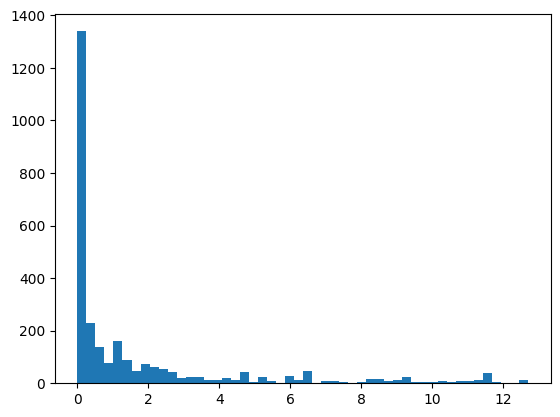

In [21]:
plt.hist(df_hist['anomaly_score'],bins=50);

# Anomaly scores and repair events

Let's review anomaly scores and a few repair events.

0 {0: ['2012-07-02', 1], 4: ['2012-06-04', 0], 6: ['2012-09-17', 1], 12: ['2012-03-23', 0], 13: ['2012-10-18', 1]}
2 {0: ['2012-07-02', 1], 4: ['2012-06-04', 0], 6: ['2012-09-17', 1], 12: ['2012-03-23', 0], 13: ['2012-10-18', 1]}
4 {0: ['2012-07-02', 1], 4: ['2012-06-04', 0], 6: ['2012-09-17', 1], 12: ['2012-03-23', 0], 13: ['2012-10-18', 1]}
5 {0: ['2012-07-02', 1], 4: ['2012-06-04', 0], 6: ['2012-09-17', 1], 12: ['2012-03-23', 0], 13: ['2012-10-18', 1]}
6 {0: ['2012-07-02', 1], 4: ['2012-06-04', 0], 6: ['2012-09-17', 1], 12: ['2012-03-23', 0], 13: ['2012-10-18', 1]}
8 {0: ['2012-07-02', 1], 4: ['2012-06-04', 0], 6: ['2012-09-17', 1], 12: ['2012-03-23', 0], 13: ['2012-10-18', 1]}
12 {0: ['2012-07-02', 1], 4: ['2012-06-04', 0], 6: ['2012-09-17', 1], 12: ['2012-03-23', 0], 13: ['2012-10-18', 1]}
13 {0: ['2012-07-02', 1], 4: ['2012-06-04', 0], 6: ['2012-09-17', 1], 12: ['2012-03-23', 0], 13: ['2012-10-18', 1]}
14 {0: ['2012-07-02', 1], 4: ['2012-06-04', 0], 6: ['2012-09-17', 1], 12: ['20

<Figure size 640x480 with 0 Axes>

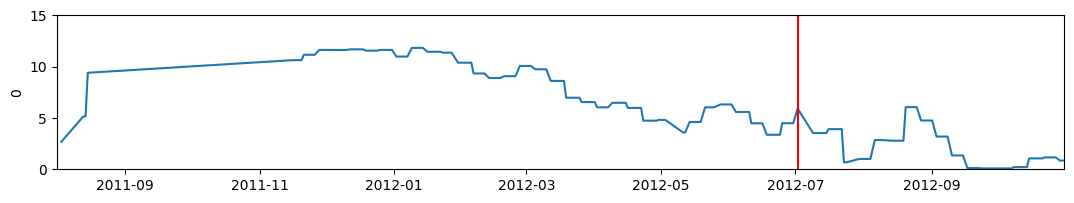

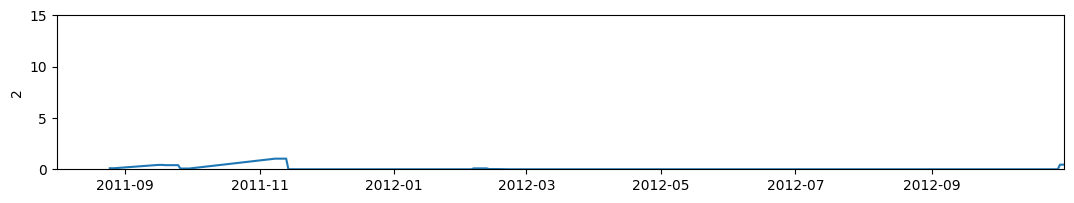

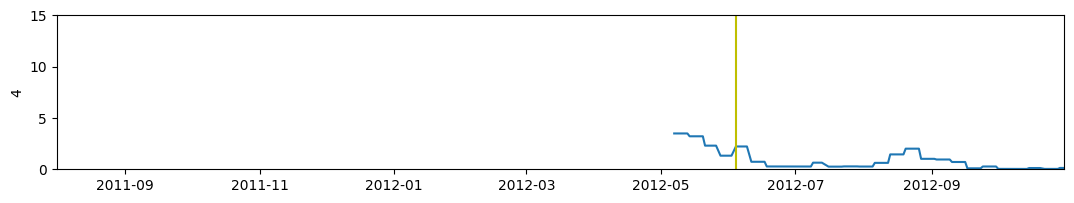

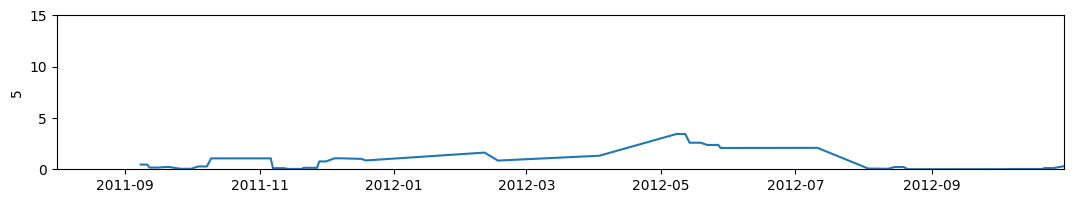

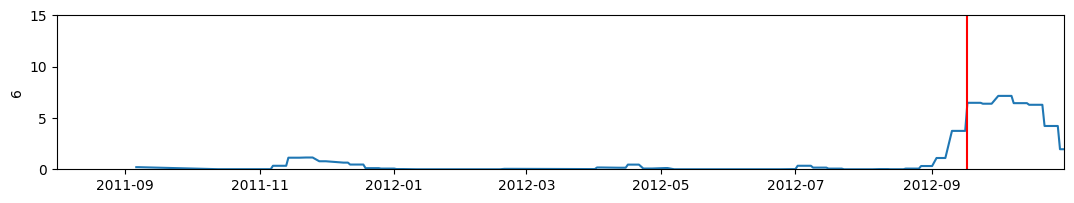

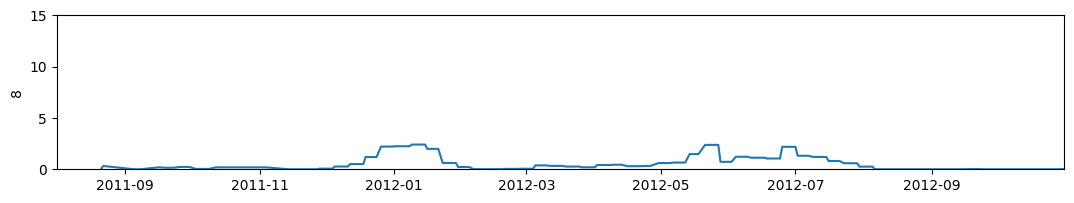

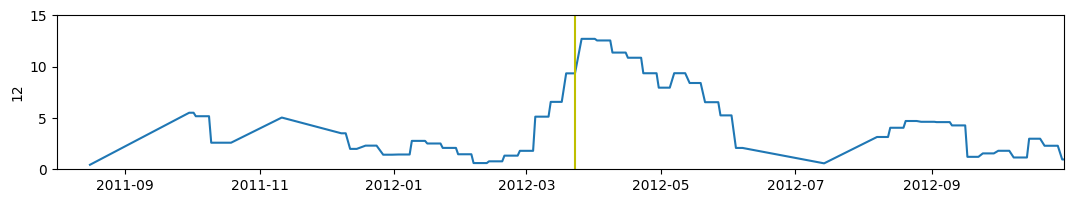

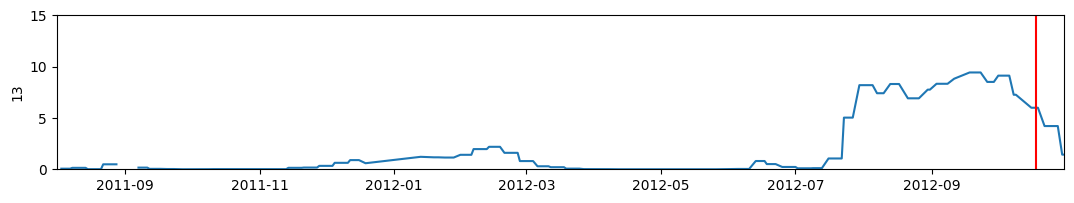

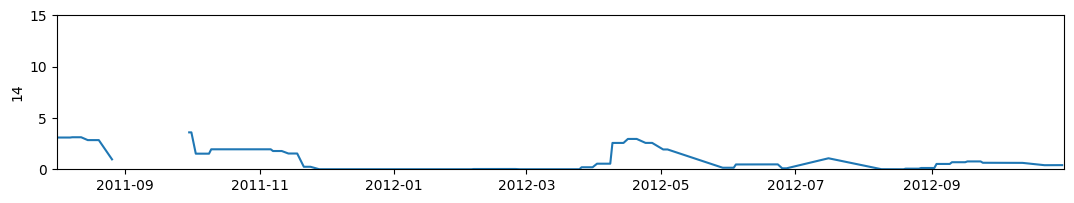

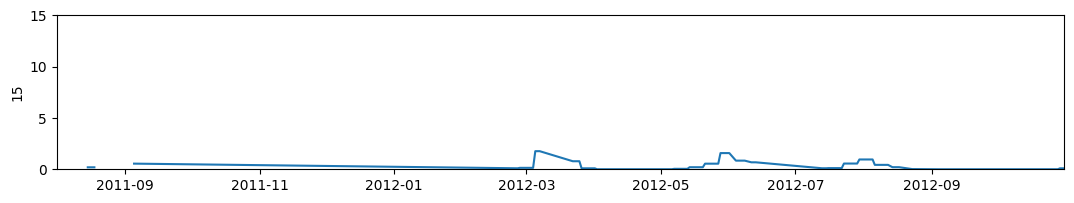

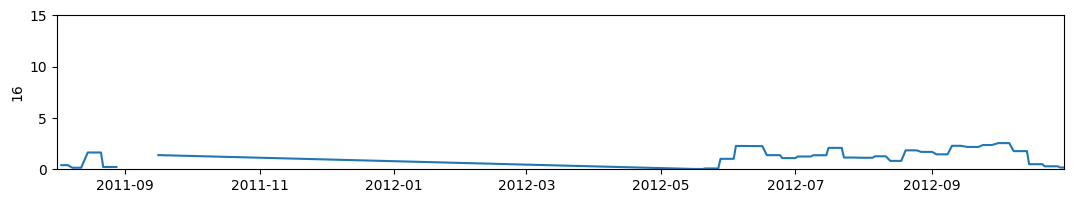

In [17]:
events = {
    0: ["2012-07-02", 1],
    4: ["2012-06-04", 0],
    6: ["2012-09-17", 1],
    12: ["2012-03-23", 0],
    13: ["2012-10-18", 1]
}

plt.clf()

for i_vid, vid in enumerate(df_hist["id"].unique()):
    
    veh_readings = df_hist[df_hist["id"]==vid].copy().sort_values(by=['t'])
    
    plt.figure(figsize=(13, 2))
    plt.plot(veh_readings["t"].values, veh_readings["anomaly_score"].values)
    plt.ylabel(vid)
    plt.xlim(df_hist["t"].min(), df_hist["t"].max())
    plt.ylim([0, 15])
    
    print(vid, events)
    if vid in events:
        if events[vid][1]:
            plt.axvline(x=pd.to_datetime(events[vid][0]), c="r")
        else:
            plt.axvline(x=pd.to_datetime(events[vid][0]), c="y")

<Figure size 640x480 with 0 Axes>

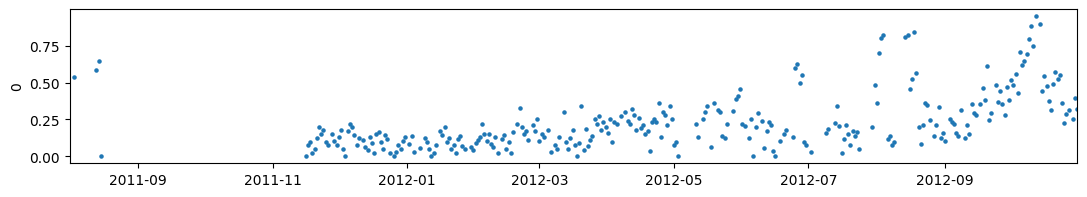

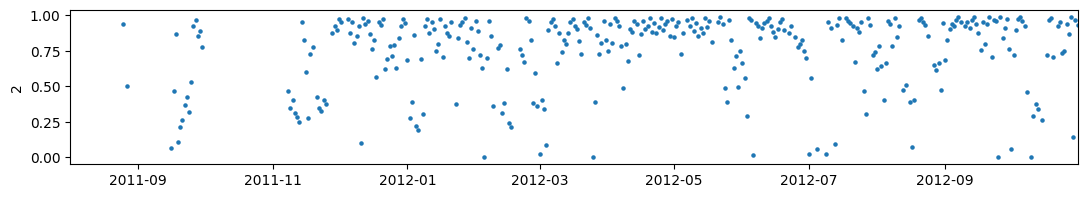

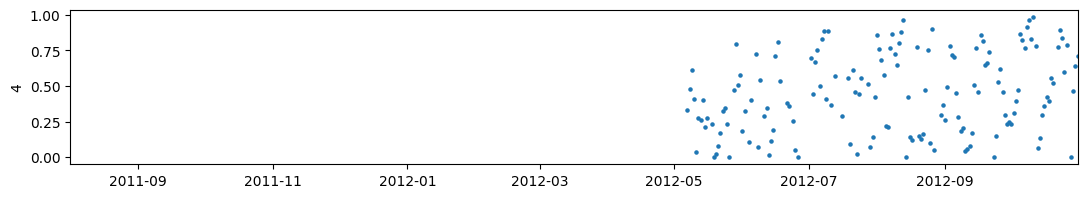

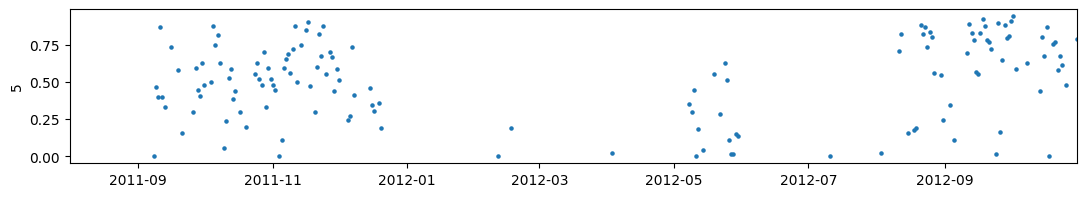

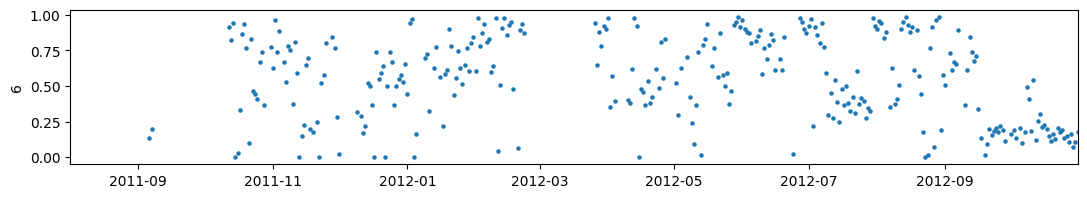

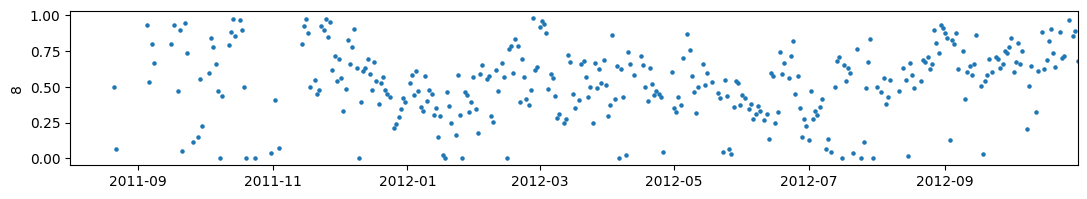

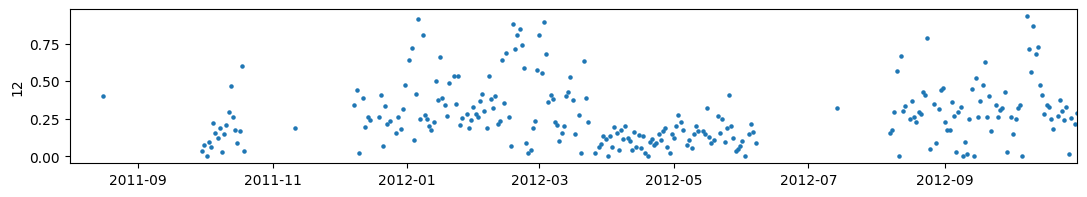

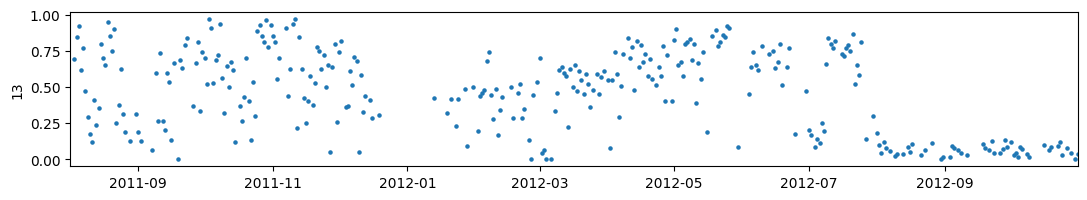

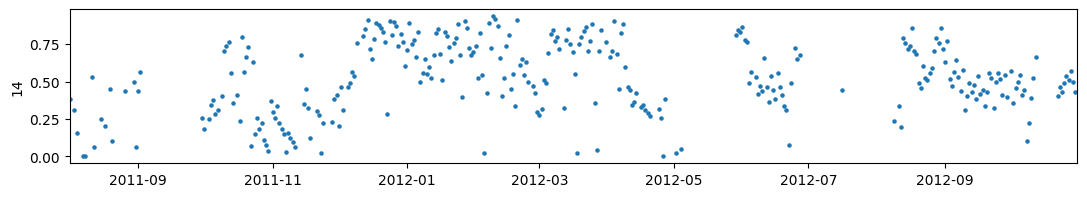

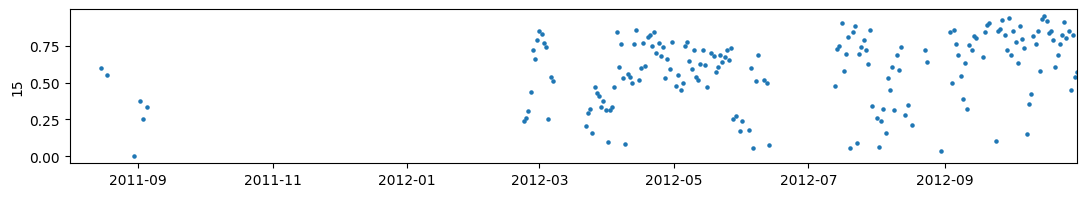

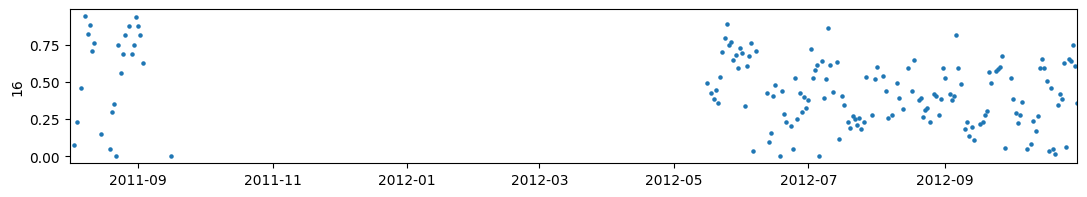

In [22]:
plt.clf()

for i_vid, vid in enumerate(df_hist["id"].unique()):

    veh_readings = df_hist[df_hist["id"]==vid].copy().sort_values(by=['t'])
    
    plt.figure(figsize=(13, 2))
    plt.scatter(veh_readings["t"], veh_readings["z_score"], s=5, marker="o")
    plt.xlim(df_hist["t"].min(), df_hist["t"].max())
    plt.ylabel(vid)

# Reference

- Fan, Y., Nowaczyk, S., & Rögnvaldsson, T. (2015). Evaluation of self-organized approach for predicting compressor faults in a city bus fleet. Procedia Computer Science, 53, 447-456.

- Fan, Yuantao, Sławomir Nowaczyk, Thorsteinn Rögnvaldsson, and Eric Aislan Antonelo. "Predicting air compressor failures with echo state networks." PHM Society European Conference. Vol. 3. No. 1. 2016.
